In [8]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#author - Jason Matthew Green
#university - North Carolina Agricultural and Technical University 
# Professor - Li-Shang Tsay 
# Class - CST731
#
# This python environment is built off of Anaconda's Jupyter Notebook Anaconda Individual Edition 2021.11 includes a new release of Anaconda Navigator - version 2.1. 

# Preprocessing Data

In [9]:
pd.set_option('max_rows',100)
df=pd.read_csv("us-counties.csv")

df['date']=pd.to_datetime(df['date'],yearfirst=True)
df.set_index('date',inplace=True)
df.head(100)

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
2020-01-25,Orange,California,6059.0,1,0.0
2020-01-25,Cook,Illinois,17031.0,1,0.0
2020-01-25,Snohomish,Washington,53061.0,1,0.0
2020-01-26,Maricopa,Arizona,4013.0,1,0.0


In [10]:
total_cases=df.loc[pd.Timestamp('2020-07-09')]
total_cases.head(10)

,county,state,fips,cases,deaths
date,,,,,
2020-07-09,Autauga,Alabama,1001.0,661,14.0
2020-07-09,Baldwin,Alabama,1003.0,1131,11.0
2020-07-09,Barbour,Alabama,1005.0,371,2.0
2020-07-09,Bibb,Alabama,1007.0,211,1.0
2020-07-09,Blount,Alabama,1009.0,282,1.0
2020-07-09,Bullock,Alabama,1011.0,375,11.0
2020-07-09,Butler,Alabama,1013.0,646,28.0
2020-07-09,Calhoun,Alabama,1015.0,445,5.0
2020-07-09,Chambers,Alabama,1017.0,672,27.0


# Visualizing Data 

In [11]:
total=total_cases.groupby(['state']).agg({'cases':['sum']})
total.columns=['total_cases']

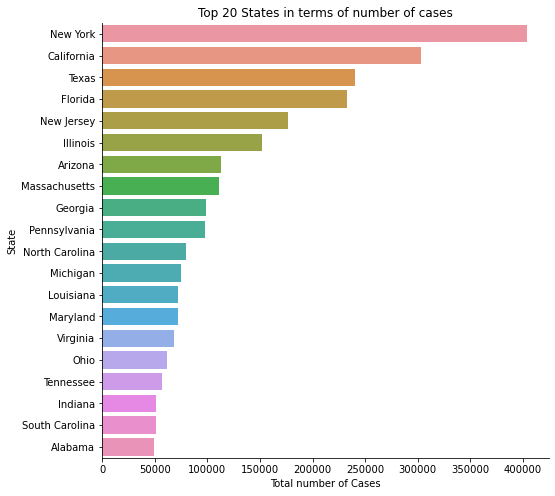

In [13]:
cases=total.nlargest(20,['total_cases'])
plt.figure(figsize=(8,8))

sns.barplot(x='total_cases',y=cases.index,data=cases,orient='h')
plt.title('Top 20 States in terms of number of cases')
plt.ylabel('State')
plt.xlabel('Total number of Cases')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [14]:
death=total_cases.groupby(['state']).agg({'deaths':['sum']})
death.columns=['total_deaths']
death.head(20)

,total_deaths
state,
Alabama,1068.0
Alaska,15.0
Arizona,2047.0
Arkansas,309.0
California,6825.0
Colorado,1707.0
Connecticut,4348.0
Delaware,517.0
District of Columbia,568.0


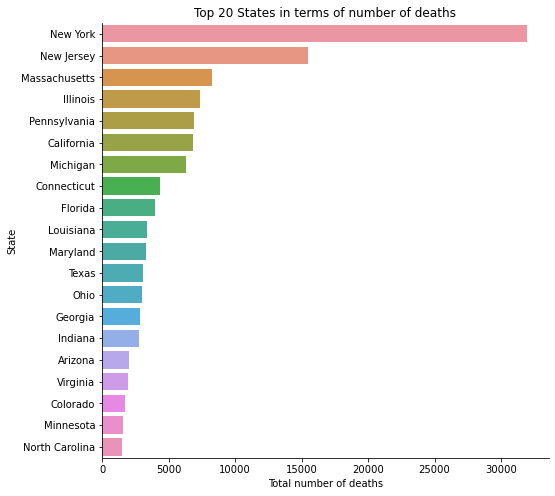

In [17]:
deaths=death.nlargest(20,['total_deaths'])
plt.figure(figsize=(8,8))

sns.barplot(x='total_deaths',y=deaths.index,data=deaths,orient='h')
plt.title('Top 20 States in terms of number of deaths')
plt.ylabel('State')
plt.xlabel('Total number of deaths')
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)